In [1]:
!unzip -qq /content/drive/MyDrive/brainage-data.zip

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
import numpy as np
from glob import glob
from skimage.io import imread

In [ ]:
sub-CC110033_T1w_brain_mask.nii.gz

sub-CC110033_T1w_unbiased.nii.gz

In [5]:
BASE_IMG_PATH=os.path.join('/content/data/brain_age/images')

In [15]:
# show some of the files
all_images = glob(os.path.join(BASE_IMG_PATH,'*'))
all_masks = [x.replace('_unbiased', '_brain_mask') for x in all_images]
all_masks = [x.replace('/images', '/masks') for x in all_masks]
print(len(all_images),' matching files found:',all_images[0], all_masks[0])

652  matching files found: /content/data/brain_age/images/sub-CC620610_T1w_unbiased.nii.gz /content/data/brain_age/masks/sub-CC620610_T1w_brain_mask.nii.gz


In [16]:
all_images[0]

'/content/data/brain_age/images/sub-CC620610_T1w_unbiased.nii.gz'

In [17]:
all_masks[0]

'/content/data/brain_age/masks/sub-CC620610_T1w_brain_mask.nii.gz'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


Text(0.5, 1.0, 'Mask')

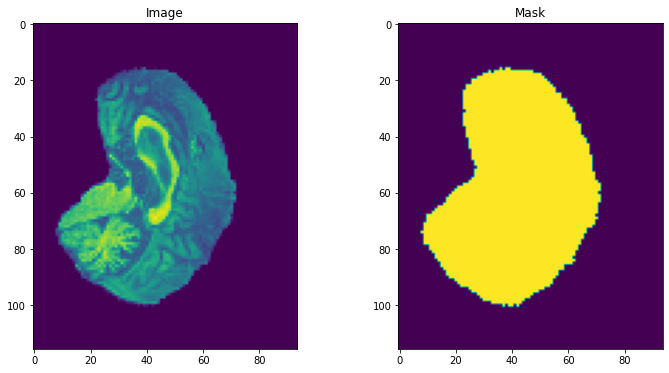

In [18]:
%matplotlib inline
try:
    import nibabel as nib
except:
    raise ImportError('Install NIBABEL')

test_image=nib.load(all_images[0]).get_data()
test_mask=nib.load(all_masks[0]).get_data()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(test_image[test_image.shape[0]//2])
ax1.set_title('Image')
ax2.imshow(test_mask[test_image.shape[0]//2])
ax2.set_title('Mask')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


Text(0.5, 1.0, 'Mask')

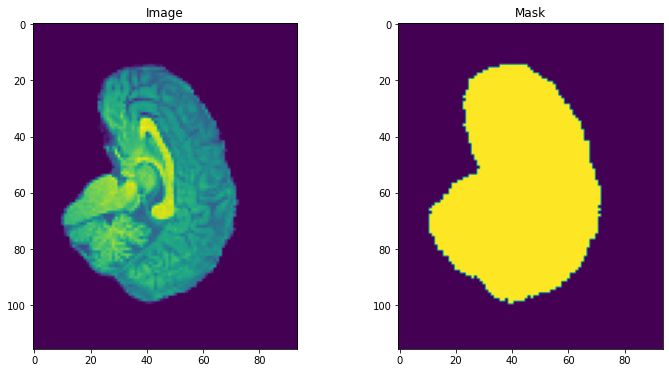

In [20]:
test_image=nib.load(all_images[576]).get_data()
test_mask=nib.load(all_masks[576]).get_data()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(test_image[test_image.shape[0]//2])
ax1.set_title('Image')
ax2.imshow(test_mask[test_image.shape[0]//2])
ax2.set_title('Mask')

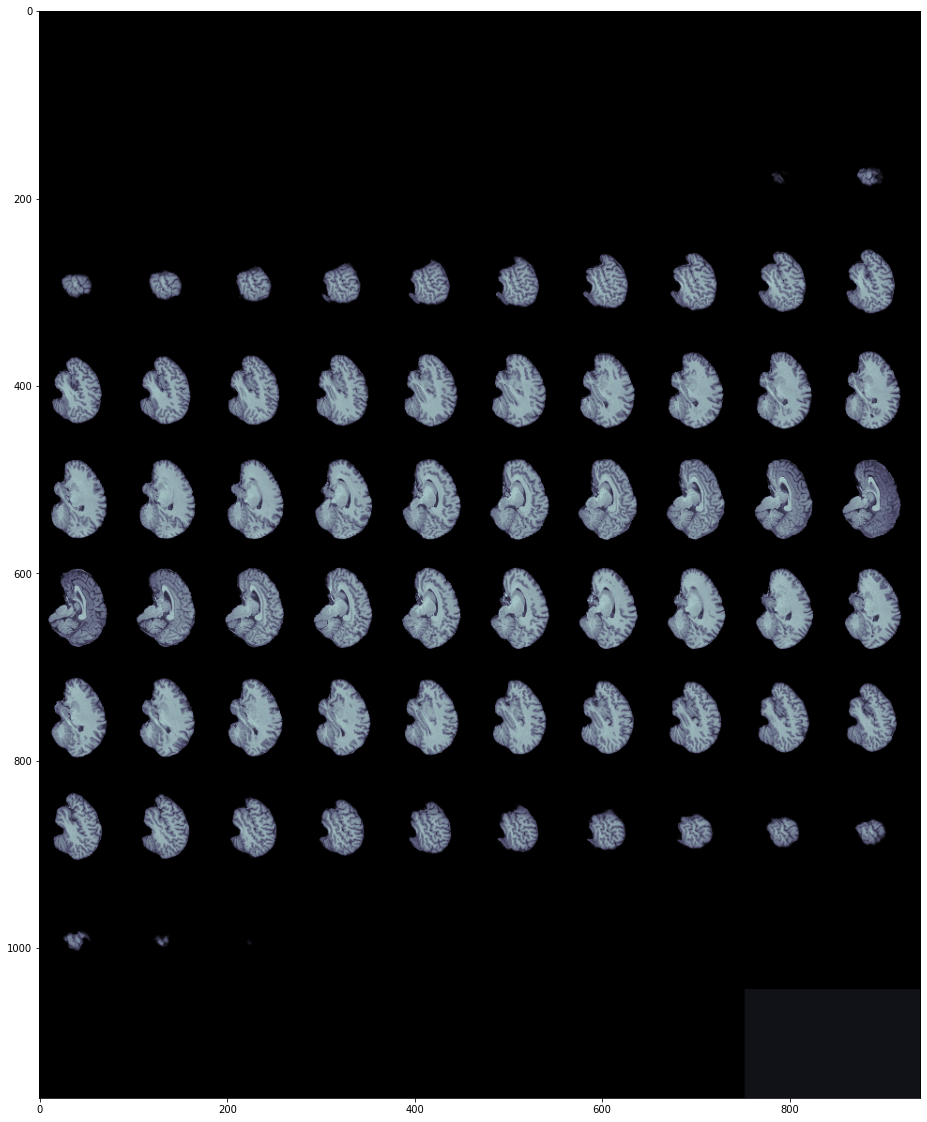

In [23]:
from skimage.util import montage as montage2d
fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
ax1.imshow(montage2d(test_image), cmap ='bone')
fig.savefig('ct_scan.png')

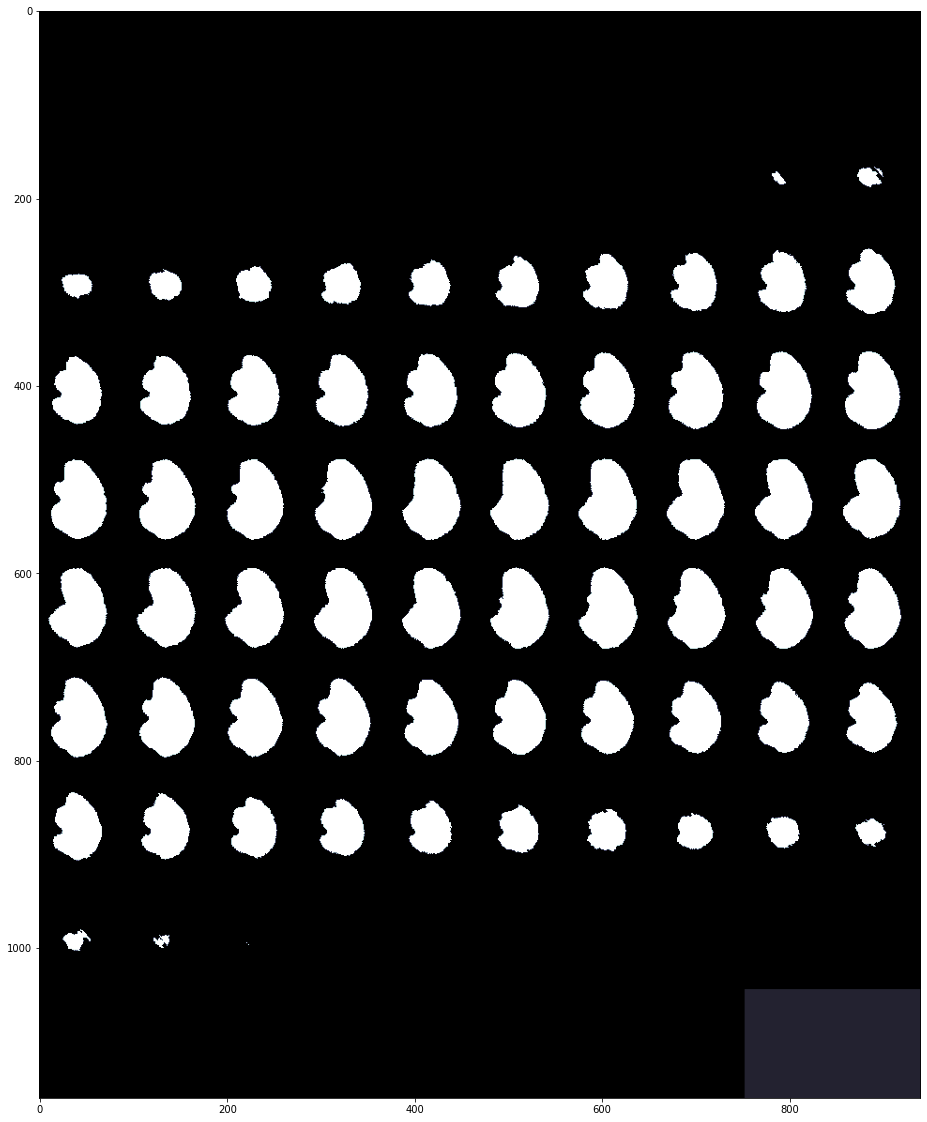

In [24]:
fig, ax1 = plt.subplots(1,1, figsize = (20, 20))
ax1.imshow(montage2d(test_mask), cmap ='bone')
fig.savefig('mask.png')